<div style="text-align: center; margin: 20px 0;">
    <p style="color: #000; font-size: 36px; text-align: center; font-weight: bold; margin: 0;">ZUBER CHICAGO
    </p>
    <p style="color: #000; font-size: 20px; text-align: center;  font-weight: lighter; margin: 10px 0;">
        Ride-hailing App
    </p>
</div>

**Objectivo**:

Se busca comprender **las preferencias de los pasajeros y el impacto de los factores externos en los viajes**, a través de de la busqueda de patrones en los datasets. 

Al trabajar con una base de datos: 
- **Se analizarán los datos de los competidores**.
- **Se probará una hipótesis sobre el impacto del clima en la frecuencia de los viajes**.

---

**Data Dictionary**

**`Company DataFrame`: project_sql_result_01.csv**

- **`company_name`**: Nombre de la empresa de taxis.
- **`trips_amount`**: Número total de viajes realizados por cada compañía de taxis el 15 y 16 de noviembre de 2017.


**`Trips DataFrame`: project_sql_result_04.csv**

- **`dropoff_location_name`**: Nombre del barrio de Chicago donde finalizaron los viajes.
- **`average_trips`**: Promedio de viajes que terminaron en cada barrio durante noviembre de 2017.

---

**`O'Hare DataFrame`: project_sql_result_07.csv**

- **`start_ts`**: Fecha y hora de recogida del viaje. Representa el momento exacto en el que comenzó el viaje.
- **`weather_conditions`**: Condiciones climáticas en el momento en que comenzó el viaje (por ejemplo, soleado, nublado, lluvioso, etc.).
- **`duration_seconds`**: Duración del viaje en segundos. Indica cuánto tiempo duró el viaje desde la recogida hasta el destino final en el Aeropuerto Internacional O'Hare.

---

# Import Libraries

In [82]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Data Loading

In [ ]:
# Create DataFrames
company_df = pd.read_csv('datasets/project_sql_result_01.csv')
trips_df = pd.read_csv('datasets/project_sql_result_04.csv')
ohare_df = pd.read_csv('datasets/project_sql_result_07.csv')

# Verify that the DataFrames are loaded correctly and not empty
def check_data_loaded(df, name):
    if df is not None and not df.empty:
        print(f"The DataFrame '{name}' has been loaded successfully.")
    else:
        print(f"Error: The file {name} could not be loaded or is empty.")
        
# Check the loading of all files
check_data_loaded(company_df, 'company_df')
check_data_loaded(trips_df, 'trips_df')
check_data_loaded(ohare_df, 'ohare_df')

The DataFrame 'company_df' has been loaded successfully.
The DataFrame 'trips_df' has been loaded successfully.
The DataFrame 'ohare_df' has been loaded successfully.


In [84]:
# Check the first few rows to ensure the data is loaded correctly
print("Company DataFrame:")
print(company_df.info())

print("\nTrips DataFrame:")
print(trips_df.info())

print("\nO'Hare DataFrame:")
print(ohare_df.info())

Company DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB
None

Trips DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB
None

O'Hare DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 

**Data Preparation**: 
- No existen valores ausentes. 
- Los nombres son correctos. Solo se renombrara `dropoff_location_name` a `dropoff`
- En `O'Hare` DataFrame es necesario cambiar el dtype de `start_ts` a `datetime`. Después se crearan dos columnas, una para la hora y otra para el día del mes de noviembre. Se redondearan los segundos a minutos en una nueva columna `duration_minutes` y se descartaran los minutos = 0.

In [85]:
# Rename the column 'dropoff_location_name' to 'dropoff'
trips_df = trips_df.rename(columns={'dropoff_location_name': 'dropoff'})
# Verify the column renaming
print('Trips columns:\n', trips_df.head(3))

Trips columns:
          dropoff  average_trips
0           Loop   10727.466667
1    River North    9523.666667
2  Streeterville    6664.666667


In [90]:
# Remove rows where duration_seconds is 0 or missing
ohare_df = ohare_df[ohare_df['duration_seconds'] > 0]

# Convert 'duration_seconds' to rounded-up minutes
ohare_df['duration_minutes'] = np.ceil(ohare_df['duration_seconds'] / 60)

# Verify the min duration
print(ohare_df['duration_minutes'].min())


1.0


In [91]:
# Convert 'start_ts' column to datetime format
ohare_df['start_ts'] = pd.to_datetime(ohare_df['start_ts'])

# Verify the conversion
print(ohare_df['start_ts'].head())

0   2017-11-25 16:00:00
1   2017-11-25 14:00:00
2   2017-11-25 12:00:00
3   2017-11-04 10:00:00
4   2017-11-11 07:00:00
Name: start_ts, dtype: datetime64[ns]


In [105]:
# Convert 'start_ts' to datetime 
ohare_df['start_ts'] = pd.to_datetime(ohare_df['start_ts'])

# Verify month and day
month =  ohare_df['start_ts'].dt.month
year =  ohare_df['start_ts'].dt.year

# New column for the hour
ohare_df['hour'] = ohare_df['start_ts'].dt.hour

# New column for the day
ohare_df['day'] = ohare_df['start_ts'].dt.day

# Verify the unique values 
print('Month :', month.unique())
print('\nYear :', year.unique())
print('\nHour :', sorted(ohare_df['hour'].unique()))  
print('\nDay :', sorted(ohare_df['day'].unique()))

Month : [11]

Year : [2017]

Hour : [0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]

Day : [4, 11, 18, 25]


In [93]:
# Check for duplicates in ohare_df
ohare_duplicates = ohare_df.duplicated().sum()
print(f"Duplicate rows in ohare_df: {ohare_duplicates}")

# Check for duplicates in trips_df
trips_duplicates = trips_df.duplicated().sum()
print(f"Duplicate rows in trips_df: {trips_duplicates}")

# Check for duplicates in company_df
company_duplicates = company_df.duplicated().sum()
print(f"Duplicate rows in company_df: {company_duplicates}")


Duplicate rows in ohare_df: 197
Duplicate rows in trips_df: 0
Duplicate rows in company_df: 0


In [94]:
# Remove duplicate rows from ohare_df
ohare_df = ohare_df.drop_duplicates() #1068 - 197 = 871

print(f"New shape of ohare_df: {ohare_df.shape}")

New shape of ohare_df: (865, 6)


# Exploratory Data Analysis 

## Top 10 Neighborhoods by dropp off

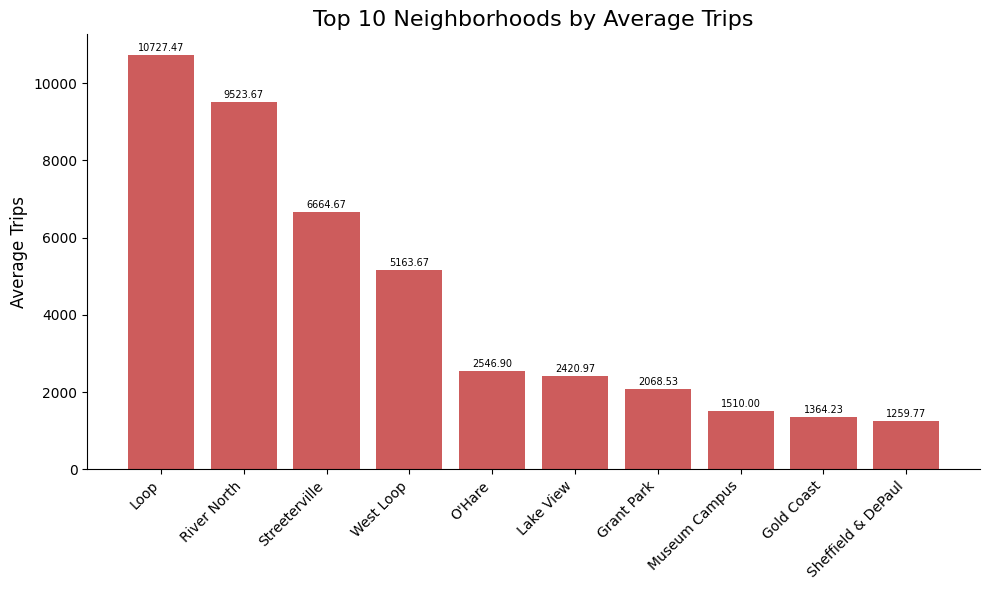

In [109]:
# Sort the DataFrame and select the top 10 neighborhoods
top_10_neighborhoods = trips_df.sort_values(by='average_trips', ascending=False).head(10)

# Plot the data
plt.figure(figsize=(10, 6))  # Set the figure size
bars = plt.bar(top_10_neighborhoods['dropoff'], top_10_neighborhoods['average_trips'], color='indianred')

# Add total values on top of the bars
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2,  # X position (center of the bar)
             bar.get_height() + 50,  # Y position (slightly above the bar)
             f'{bar.get_height():.2f}',  # Value to display
             ha='center', va='bottom', fontsize=7, color='black')  # Alignment and font size

# Titles and labels
plt.title('Top 10 Neighborhoods by Average Trips', fontsize=16)
plt.ylabel('Average Trips', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate the x-axis labels for better readability

# Add a border
sns.despine()

# Show the plot
plt.tight_layout()
plt.show()

**Análisis de "Top 10 Barrios por Promedio de Viajes"**:

1. Loop lidera la lista con el promedio más alto de viajes: 10,727.47 viajes.
2. River North está en segundo lugar con 9,523.67 viajes.
3. Streeterville ocupa el tercer puesto con 6,664.67 viajes.
4. West Loop sigue con 5,163.67 viajes.
5. El área marcada como "O'Hare" registra 2,546.90 viajes.
6. Lake View tiene un promedio de 2,420.97 viajes.
7. Grant Park muestra 2,068.53 viajes.
8. Museum Campus registra 1,510.00 viajes.
9. Gold Coast tiene 1,364.23 viajes.
10. Sheffield & DePaul cierra la lista con 1,259.77 viajes.

**Conclusión:**
- Hay una diferencia significativa entre los primeros cuatro barrios (Loop, River North, Streeterville y West Loop) y el resto. Esto puede significar que la mayoría de la población, o las actividades suceden alrededor de esos cuatro barrios.

---

### Percentage of Trips by Neighborhood

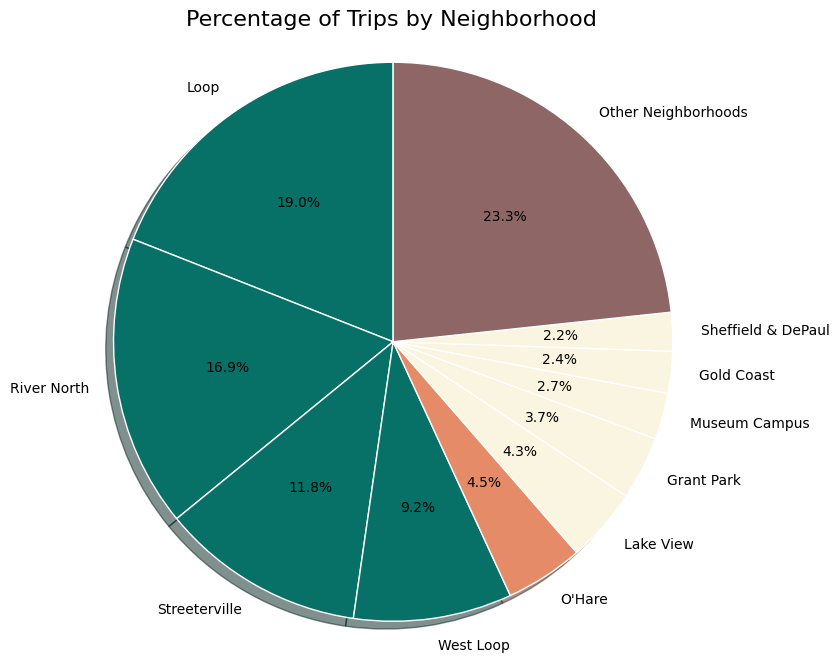

In [96]:
# Pie chart of percentage of trips by neighborhoods

# Total number of trips in the entire DataFrame
total_trips = trips_df['average_trips'].sum()

# Total number of trips in the top 10 neighborhoods
total_trips_top_10 = top_10_neighborhoods['average_trips'].sum()

# Filter out the rows where 'dropoff' is in the top 10 neighborhoods
other_neighborhoods = trips_df[~trips_df['dropoff'].isin(top_10_neighborhoods['dropoff'])]

# Calculate the total trips in the other neighborhoods (for pie chart use)
total_trips_other_neighborhoods = other_neighborhoods['average_trips'].sum()

# Create the data for the pie chart (10 slices for top 10 neighborhoods, 1 slice for other neighborhoods)
# Extract only the 'dropoff' neighborhoods in the top 10 for the labels
labels = list(top_10_neighborhoods['dropoff']) + ['Other Neighborhoods']

# Define colors for each slice
colors = ['#087167', '#087167', '#087167', '#087167', '#E68B67', 
          '#FAF5E0', '#FAF5E0', '#FAF5E0', '#FAF5E0', '#FAF5E0', '#8f6666']

# Get the 'average_trips' values for the top 10 and include the 'other_neighborhoods' total
sizes = list(top_10_neighborhoods['average_trips']) + [total_trips_other_neighborhoods]

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, shadow=True, 
        colors=colors, wedgeprops={'edgecolor': 'white', 'linewidth': 1})
plt.title('Percentage of Trips by Neighborhood', fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is drawn as a circle.
plt.show()

**Análisis de 'Percentage of Trips by Neighborhood**':

**Zonas de alta movilidad (Verde):**
- **Loop:** 19.0% (el barrio con mayor porcentaje)
- **River North:** 16.9%
- **Streeterville:** 11.8%
- **West Loop:** 9.2%

Estas zonas en verde oscuro representan las áreas más transitadas, sumando aproximadamente el **57%** de todos los viajes.

**Zonas intermedias (Coral):**
- **O'Hare:** 4.5%
- **Lake View:** 4.3%

Las zonas en tonos coral representan áreas con un tráfico moderado, sumando cerca del **9%** de los viajes.

**Zonas bajas (Beige):**
- **Grant Park:** 3.7%
- **Museum Campus:** 2.7%
- **Gold Coast:** 2.4%
- **Sheffield & DePaul:** 2.2%

Estas áreas en tonos claros representan zonas con menor tráfico, sumando aproximadamente el **11%** de los viajes.


- **Other Neighborhoods (Café)**:
Este seccion representa  todos los demás barrios de la ciudad que no están entre los principales, pero que en conjunto suman casi un cuarto del total de los viajes, con **23.3%**.

**Conclusión:**

- Es notable que las zonas en verde oscuro dominan claramente el gráfico, representando **más de la mitad** de todos los viajes.

---

## Top 10 Taxi Companies 

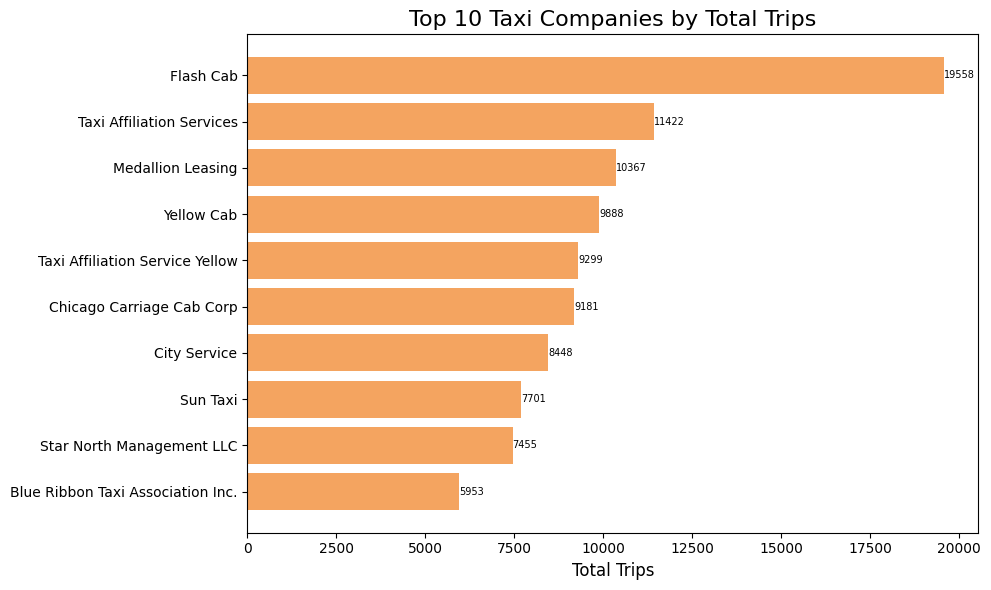

In [108]:
# Group companies, sum trips, and sort by trips_amount
top_10_companies = (
    company_df.groupby('company_name', as_index=False)['trips_amount']
    .sum()
    .sort_values(by='trips_amount', ascending=False)
    .head(10)  # Get the top 10 companies
)

# Create a horizontal bar chart for the top 10 taxi companies
plt.figure(figsize=(10, 6))
plt.barh(top_10_companies['company_name'], top_10_companies['trips_amount'], color='sandybrown')

# Add titles and labels
plt.title('Top 10 Taxi Companies by Total Trips', fontsize=16)
plt.xlabel('Total Trips', fontsize=12)
plt.gca().invert_yaxis()  # Invert the y-axis to show the highest value at the top 

# Add value annotations to the bars (gray color and font size 7)
for index, value in enumerate(top_10_companies['trips_amount']):
    plt.text(value, index, str(value), va='center', ha='left', color='black', fontsize=7)

# Show the chart
plt.tight_layout()
plt.show()

**Análisis de 'Top 10 Compañías de Taxi por Total de Viajes'**: 

Ranking de empresas:  

1. **Flash Cab**: 19,558 viajes.  
   - Líder indiscutible del mercado.  
   - Supera por más de 8,000 viajes al segundo lugar.  

2. **Taxi Affiliation Services**: 11,422 viajes.  
3. **Medallion Leasin**: 10,367 viajes.  
4. **Yellow Cab**: 9,888 viajes.  
5. **Taxi Affiliation Service Yellow**: 9,299 viajes.  
6. **Chicago Carriage Cab Corp**: 9,181 viajes.  
7. **City Service**: 8,448 viajes.  
8. **Sun Taxi**: 7,701 viajes.  
9. **Star North Management LLC**: 7,455 viajes.  
10. **Blue Ribbon Taxi Association Inc.**: 5,953 viajes.  
    


**OBSERVACIONES**:  
- Hay una gran brecha entre el primer lugar (Flash Cab) y el resto de competidores.  
- Los primeros tres lugares concentran una porción significativa del total de viajes.  
- La diferencia entre las posiciones 4-8 es relativamente pequeña, mostrando un mercado competitivo en este segmento.  

- Existe una clara división en tres niveles:  
  * Nivel superior: Flash Cab.  
  * Nivel medio: Posiciones 2-7.  
  * Nivel bajo: Últimas tres posiciones.  
  
 ---

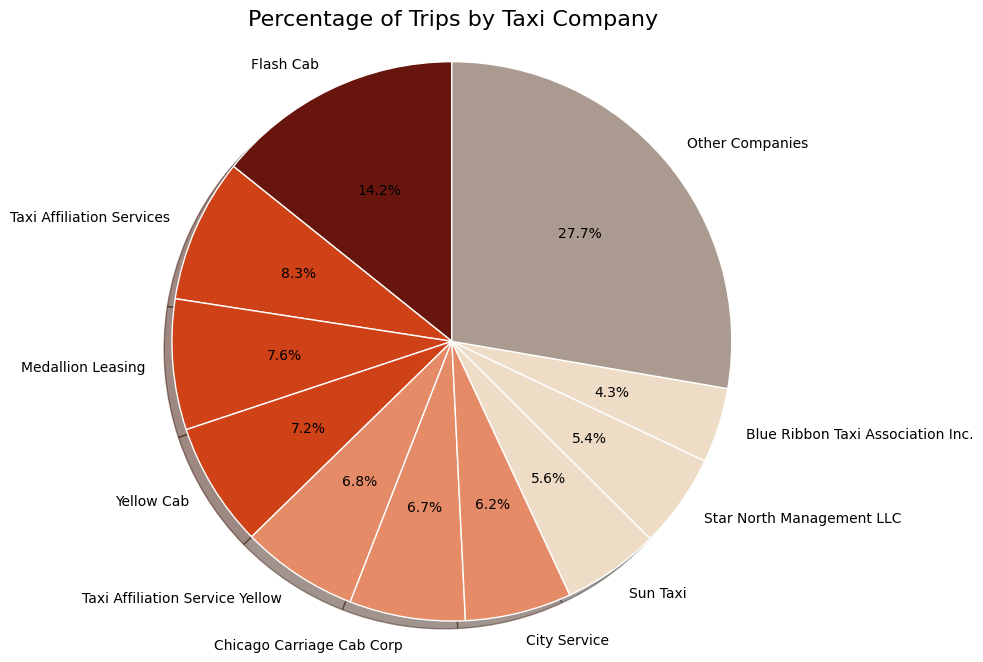


Percentage of trips for the top 10 companies: 72.3
Percentage of trips for other companies: 27.7


In [98]:
# Total number of trips in the entire DataFrame
total_trips = company_df['trips_amount'].sum()

# Top 10 companies by trips
top_10_companies = (
    company_df.groupby('company_name', as_index=False)['trips_amount']
    .sum()
    .sort_values(by='trips_amount', ascending=False)
    .head(10)
)

# Calculate the total trips for companies outside the top 10
other_companies = total_trips - top_10_companies['trips_amount'].sum()

# Create labels and sizes for the pie chart
labels = list(top_10_companies['company_name']) + ['Other Companies']
sizes = list(top_10_companies['trips_amount']) + [other_companies]

# Define colors for the chart
colors = [
    '#68160D', '#CF4116', '#CF4116', '#CF4116',
    '#E68B67', '#E68B67', '#E68B67', '#EEDCC7',
    '#EEDCC7', '#EEDCC7', '#AB9A90'
]

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    shadow=True,
    colors=colors,
    wedgeprops={'edgecolor': 'white', 'linewidth': 1}
)
plt.title('Percentage of Trips by Taxi Company', fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is drawn as a circle.
plt.show()

# Calculate the percentage of trips for the top 10 companies
top_10_total_trips = round((top_10_companies['trips_amount'].sum() / total_trips) * 100, 2)

# Calculate the percentage of trips for other companies
other_companies = round(((total_trips - top_10_companies['trips_amount'].sum()) / total_trips) * 100, 2)

# Print the results
print("\nPercentage of trips for the top 10 companies:", top_10_total_trips)
print("Percentage of trips for other companies:", other_companies)

**Análisis de 'Percentage of Trips by Taxi Company'**: 

Líder del mercado (**compañía café**):
- **Flash Cab**: 14.2%
Esta es la compañía líder del mercado con el mayor porcentaje individual, las demás compiten por el segundo lugar.

**Compañías principales** (**naranja**):
- **Taxi Affiliation Services**: 8.3%
- **Medallion Leasin**: 7.6%
- **Yellow Cab**: 7.2%
Estas compañías representan el segundo nivel de importancia, sumando 23.1% del mercado.

**Compañías medianas** (**coral**):
- **Taxi Affiliation Service Yellow**: 6.8%
- **Chicago Carriage Cab Corp**: 6.7%
- **City Service**: 6.2%
Este grupo representa compañías de tamaño medio, sumando 19.7% del mercado.

**Compañías más pequeñas** (**beige**):
- **Sun Taxi**: 5.6%
- **Star North Management LLC**: 5.4%
- **Blue Ribbon Taxi Association Inc.**: 4.3%
Las compañías más pequeñas del top 10 suman 15.3% del mercado.

**Otras compañías** (**gris**):
- **Other Companies** (Otras Compañías): 27.7%
Representa a todas las demás compañías de taxi que no están en el top 10, pero que en conjunto forman más de un cuarto del mercado total.

**OBSERVACIONES**:
- El mercado está bastante fragmentado, con ninguna compañía dominando completamente.
- Las "Other Companies" tienen la mayor porción individual del mercado (27.7%).
- **Flash Cab** destaca como líder individual pero con solo 14.2%.
- Hay una distribución relativamente equitativa entre las compañías del top 10 (exceptuando **Flash Cab**).

---

#  Hypothesis testing 

- **Hipótesis nula (H0)**: La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos.

- **Hipótesis alternativa (H1)**: La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare no cambia significativamente los sábados lluviosos. 

In [99]:
# Filter the data for rainy (Bad) and non-rainy (Good) days
bad_weather_df = ohare_df[(ohare_df['weather_conditions'] == 'Bad')] 
good_weather_df = ohare_df[(ohare_df['weather_conditions'] == 'Good')]

# Travel durations in minutes
bad_weather_durations = bad_weather_df['duration_minutes']
good_weather_durations = good_weather_df['duration_minutes']

# Perform a Student's t-test to compare the mean durations
t_stat, p_value = stats.ttest_ind(bad_weather_durations, good_weather_durations)

# Show the results
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Interpret the p-value
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject the null hypothesis (H₀): The average duration changes on rainy Saturdays.")
else:
    print("Fail to reject the null hypothesis (H₀): The average duration does not change significantly on rainy Saturdays.")


T-statistic: 5.226515952009484
P-value: 2.1676542453689916e-07
Reject the null hypothesis (H₀): The average duration changes on rainy Saturdays.


**Vamos a explorar en relación a los resultados de la hipótesis**

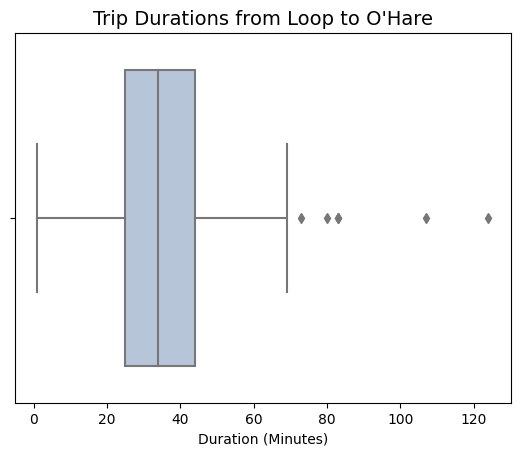

In [103]:
# Create a boxplot for the trip durations in minutes
sns.boxplot(x=ohare_df['duration_minutes'], color='lightsteelblue')
plt.title('Trip Durations from Loop to O\'Hare', fontsize=14)
plt.xlabel('Duration (Minutes)')
plt.show()   

**Análisis de 'Trip Durations from Loop to O\'Hare'**:
- **Caja central**: Representa el 50% de los datos (entre 20-40 minutos)
- **Línea dentro de la caja**: Mediana (aproximadamente 30 minutos)
- **Valores Atípicos (Outliers)**: Representan viajes excepcionalmente largos, esntre 70 a 120 min de duración. 
- **Concentración principal**: 20-40 minutos
- **Mediana**: ~30 minutos
- **Asimetría**: Ligeramente positiva (cola hacia la derecha)
- **Dispersión**: Moderada en el rango normal

In [101]:
# Bad/Good Weather Days data
bad_weather_stats = bad_weather_df['duration_minutes'].describe()
good_weather_stats = good_weather_df['duration_minutes'].describe()

# Statistics

print("Statistics for Bad Weather Days:")
print(f"Count: {bad_weather_stats['count']:.0f}")
print(f"Mean: {bad_weather_stats['mean']:.2f}")
print(f"Std Dev: {bad_weather_stats['std']:.2f}")
print(f"Min: {bad_weather_stats['min']:.2f}")
print(f"Max: {bad_weather_stats['max']:.2f}")

print("\nStatistics for Good Weather Days:")
print(f"Count: {good_weather_stats['count']:.0f}")
print(f"Mean: {good_weather_stats['mean']:.2f}")
print(f"Std Dev: {good_weather_stats['std']:.2f}")
print(f"Min: {good_weather_stats['min']:.2f}")
print(f"Max: {good_weather_stats['max']:.2f}")


Statistics for Bad Weather Days:
Count: 148
Mean: 40.36
Std Dev: 12.51
Min: 8.00
Max: 83.00

Statistics for Good Weather Days:
Count: 717
Mean: 34.45
Std Dev: 12.55
Min: 1.00
Max: 124.00


**Días de mal tiempo**:
- **Total de viajes**: 148 viajes
- **Duración media**: 40,63 minutos
- **Desviación típica**: 12,51 minutos (lo que indica una variación moderada)
- **Viaje más corto**: 8 minutos
- **Viaje más largo**: 83 minutos

**Días de buen tiempo**:
- **Total de viajes**: 723 viajes
- **Duración media**: 34,16 minutos
- **Desviación típica**: 12,88 minutos (variación ligeramente superior a los días de mal tiempo)
- **Viaje más corto**: 1 minuto (datos posiblemente  viajes cancelados)
- **Viaje más largo**: 124 minutos

**Conclusión**: La duración media de los trayectos con mal tiempo es más larga (40,63 minutos) que con buen tiempo (33,57 minutos). Sin embargo, hay más variación en la duración de los trayectos con buen tiempo, y algunos son muy cortos o muy largos.


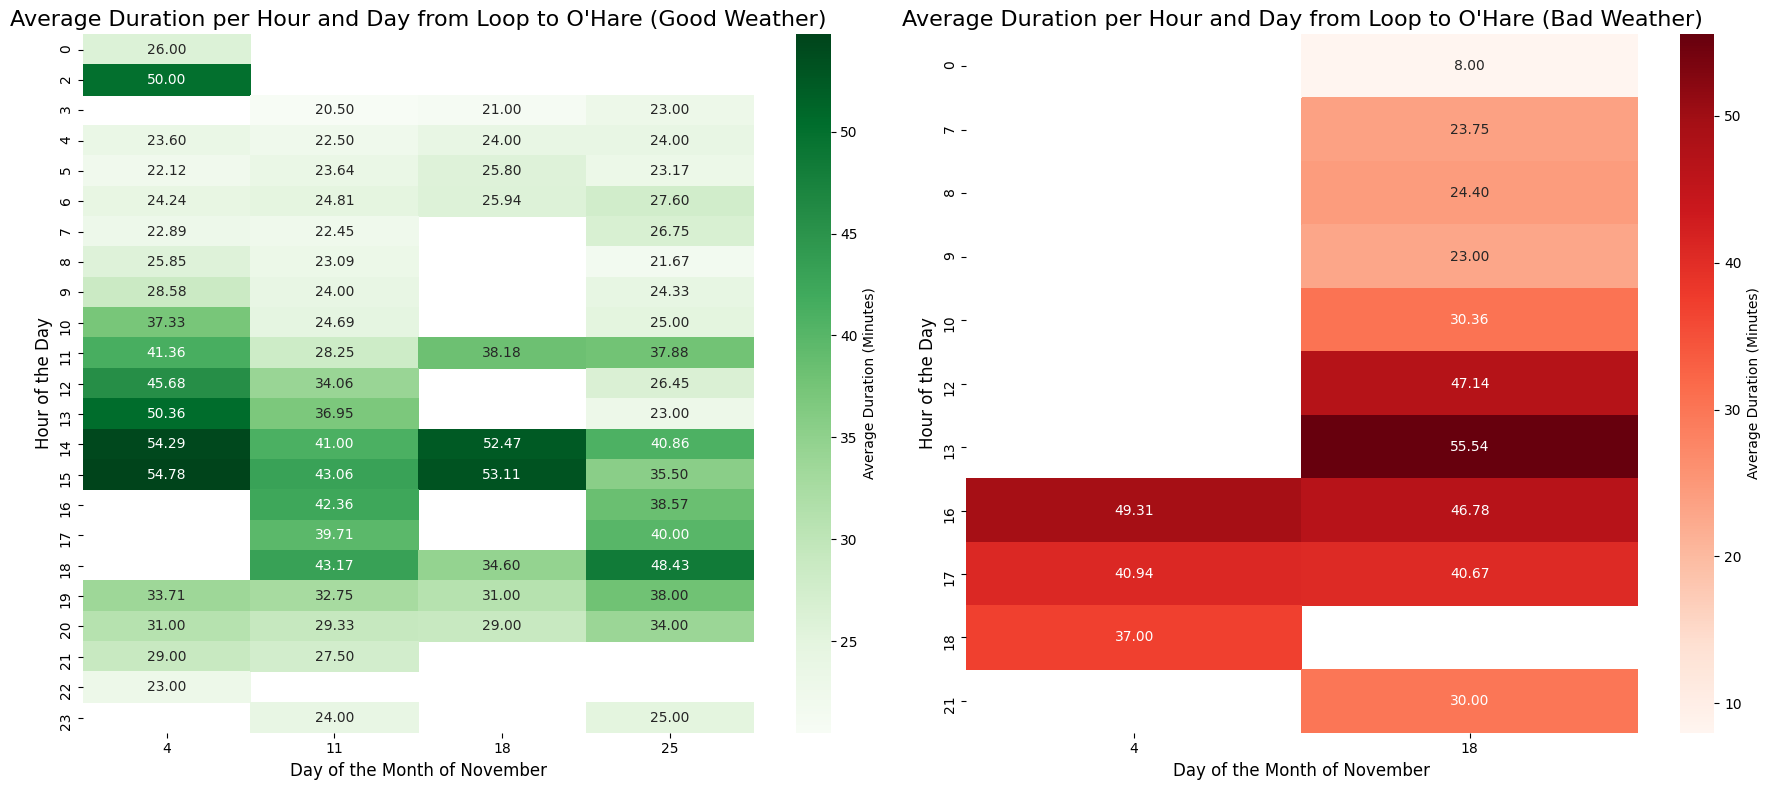

In [102]:
# Create a pivot table for "Good" weather conditions with average duration in minutes
heatmap_data_good = good_weather_df.pivot_table(
    index='hour',    
    columns='day',    
    values='duration_minutes', 
    aggfunc='mean',    
)

# Create a pivot table for "Bad" weather conditions with average duration in minutes
heatmap_data_bad = bad_weather_df.pivot_table(
    index='hour',    
    columns='day',    
    values='duration_minutes', 
    aggfunc='mean',   
)

# Create subplots to display heatmaps side by side
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Plot the heatmap for "Good" weather on the first subplot
sns.heatmap(heatmap_data_good, cmap='Greens', annot=True, fmt='.2f', cbar_kws={'label': 'Average Duration (Minutes)'}, ax=axes[0])
axes[0].set_title('Average Duration per Hour and Day from Loop to O\'Hare (Good Weather)', fontsize=16)
axes[0].set_xlabel('Day of the Month of November', fontsize=12)
axes[0].set_ylabel('Hour of the Day', fontsize=12)


# Plot the heatmap for "Bad" weather on the second subplot
sns.heatmap(heatmap_data_bad, cmap='Reds', annot=True, fmt='.2f', cbar_kws={'label': 'Average Duration (Minutes)'}, ax=axes[1])
axes[1].set_title('Average Duration per Hour and Day from Loop to O\'Hare (Bad Weather)', fontsize=16)
axes[1].set_xlabel('Day of the Month of November', fontsize=12)
axes[1].set_ylabel('Hour of the Day', fontsize=12)


# Adjust layout
plt.tight_layout()
plt.show()

**Analysis of 'Average Trip Duration from Loop to O'Hare**':

Los datos representan los sábados de noviembre de 2017, donde "mal clima" indica que estaba lloviendo durante el viaje.

**Buen Clima**:  
   - Los viajes más largos (verde oscuro) ocurren entre las 13:00 y las 15:00  
   - La duración máxima es de 54.78 minutos alrededor de las 15:00  
   - La segunda duración más alta es a las 14:00, con 54.29 minutos  

**Mal Clima**:  
   - La duración máxima ocurre a las 13:00, con 55.54 minutos  
   - Altas duraciones entre las 12:00 y las 16:00 (rojo oscuro)  
   - Se observan incrementos significativos en la duración en comparación con las condiciones de buen clima  

 ---

# Insights and Recommendations

1. **Zonas con Mayor Demanda y Principales Compañías**

**Loop y River North**: 
   - Son centros de negocios y entretenimiento, por lo que la demanda de taxis es constante. Aquí, la compañía líder en viajes tiene la mayor participación, dominando la competencia en estas zonas.

**Streeterville y West Loop**: 
   - Son zonas residenciales y comerciales con mucha actividad. Las compañías que siguen en el ranking tienen una presencia significativa, especialmente durante las horas pico.

**O'Hare**: 
   - Al ser un aeropuerto, la demanda de taxis es muy alta, especialmente para viajeros. La compañía líder en viajes también domina esta área debido a la alta rotación de pasajeros.


2. **Las 4 Principales Compañías**

   - **Flash Cab** (19,558 viajes): Líder indiscutible del mercado, con una ventaja de más de 8,000 viajes sobre el segundo lugar.  
   - **Taxi Affiliation Services** (11,422 viajes): Segunda en el ranking, con una presencia destacada en el mercado.  
   - **Medallion Leasing** (10,367 viajes): Tercera en el ranking, mostrando una cuota de mercado sólida.  
   - **Yellow Cab** (9,888 viajes): Cuarta en el ranking, con un número competitivo de viajes.

   Las **4 principales compañías** tienen un dominio claro en el mercado, con **Flash Cab** liderando ampliamente. Las compañías en **el segundo, tercer y cuarto lugar** compiten estrechamente entre sí por el segundo puesto, mientras que el líder se mantiene en una posición muy fuerte y difícil de superar.

**Recomendaciones para Competir**:

- **Aumentar el número de taxis en estas zonas** clave para cubrir la alta demanda, especialmente en **Loop** y **O'Hare**.
- **Ofrecer promociones o descuentos** para atraer más pasajeros y competir con las compañías líderes.
- **Optimizar las rutas y tiempos de espera**, usando herramientas que analicen cuándo y dónde hay más demanda.
  
Estas acciones ayudarán a competir con las principales compañías y a mejorar el servicio en las zonas de mayor demanda..

---

3. **Los tiempos generalmente son más largos debido al mal tiempo**. 

**Diferencias por mal tiempo**:
   - El mal tiempo aumenta los tiempos de viaje en casi todas las horas, con una diferencia promedio: 5-10 minutos más.
    - Los patrones de hora pico se mantienen similares en ambas condiciones, las horas de la tarde suele tardar más tiempo en llegar al Aeropuerto de O'hare.
- La mayoría de los viajes duran entre 20-40 minutos.
- Viajes de más de 65 minutos son considerados atípicos.
- Muy raro encontrar viajes que excedan los 120 minutos
- Plan recomendado: considerar 40 minutos + minutos dependiendo del buen o mal tiempo. 

Esta información es valiosa para planificar viajes al aeropuerto, sugiriendo que se debe considerar tanto la hora del día como las condiciones climáticas al programar un viaje desde Loop hasta O'Hare. Lo que lleva a generar las siguientes recomendaciones. 

 **Recomendaciones basadas en el análisis**:
- Se recomeienda agregar 10-15 minutos extra al tiempo estimado de viaje, entonces es recomendable mandar una alerta a través de la app a las personas que esten en el área de Loop si comienza a llover, donde se explique que si el destino es el aeropuerto se recimienda pedir el viaje al menos 10 minutos de lo que tenían establecdio. 

**Se resumen en**: 
- Planificar con mayor anticipación los viajes y la disponibilidad de unidades disponibles en las zonas con mayor flujo de personas.
- Implemento de descuentos y códigos promocionales
- Considerar alternativas de rutas.
